In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import pickle


In [2]:
data = pd.read_csv('../dataset/WeatherAUS.csv')
data.head()


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01    Delhi     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02    Delhi      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03    Delhi     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04    Delhi      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05    Delhi     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       NaN     16.9     21.8         No            No   
1       1007.8       NaN       NaN     17.2     24.3         No            No   
2       1008.7       NaN       2.0     21.0     23.2         No            No   
3       1012.8       NaN       NaN     18.1     26.5         No            No   
4       1006.0       7.0       8.0     17.8     29.7         No            No   

    @  
0 NaN  
1 NaN  
2 NaN  
3 NaN  
4 NaN  

[5 rows x 24 columns]

In [3]:
data.info()
data.describe()
data.isnull().sum()


<class 'pandas.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  str    
 1   Location       145460 non-null  str    
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  str    
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  str    
 10  WindDir3pm     141232 non-null  str    
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null   float64


Date                  0
Location              0
MinTemp            1485
MaxTemp            1261
Rainfall           3261
Evaporation       62790
Sunshine          69835
WindGustDir       10326
WindGustSpeed     10263
WindDir9am        10566
WindDir3pm         4228
WindSpeed9am       1767
WindSpeed3pm       3062
Humidity9am        2654
Humidity3pm        4507
Pressure9am       15065
Pressure3pm       15028
Cloud9am          55888
Cloud3pm          59358
Temp9am            1767
Temp3pm            3609
RainToday          3261
RainTomorrow       3253
@                145460
dtype: int64

In [4]:
data.shape


(145460, 24)

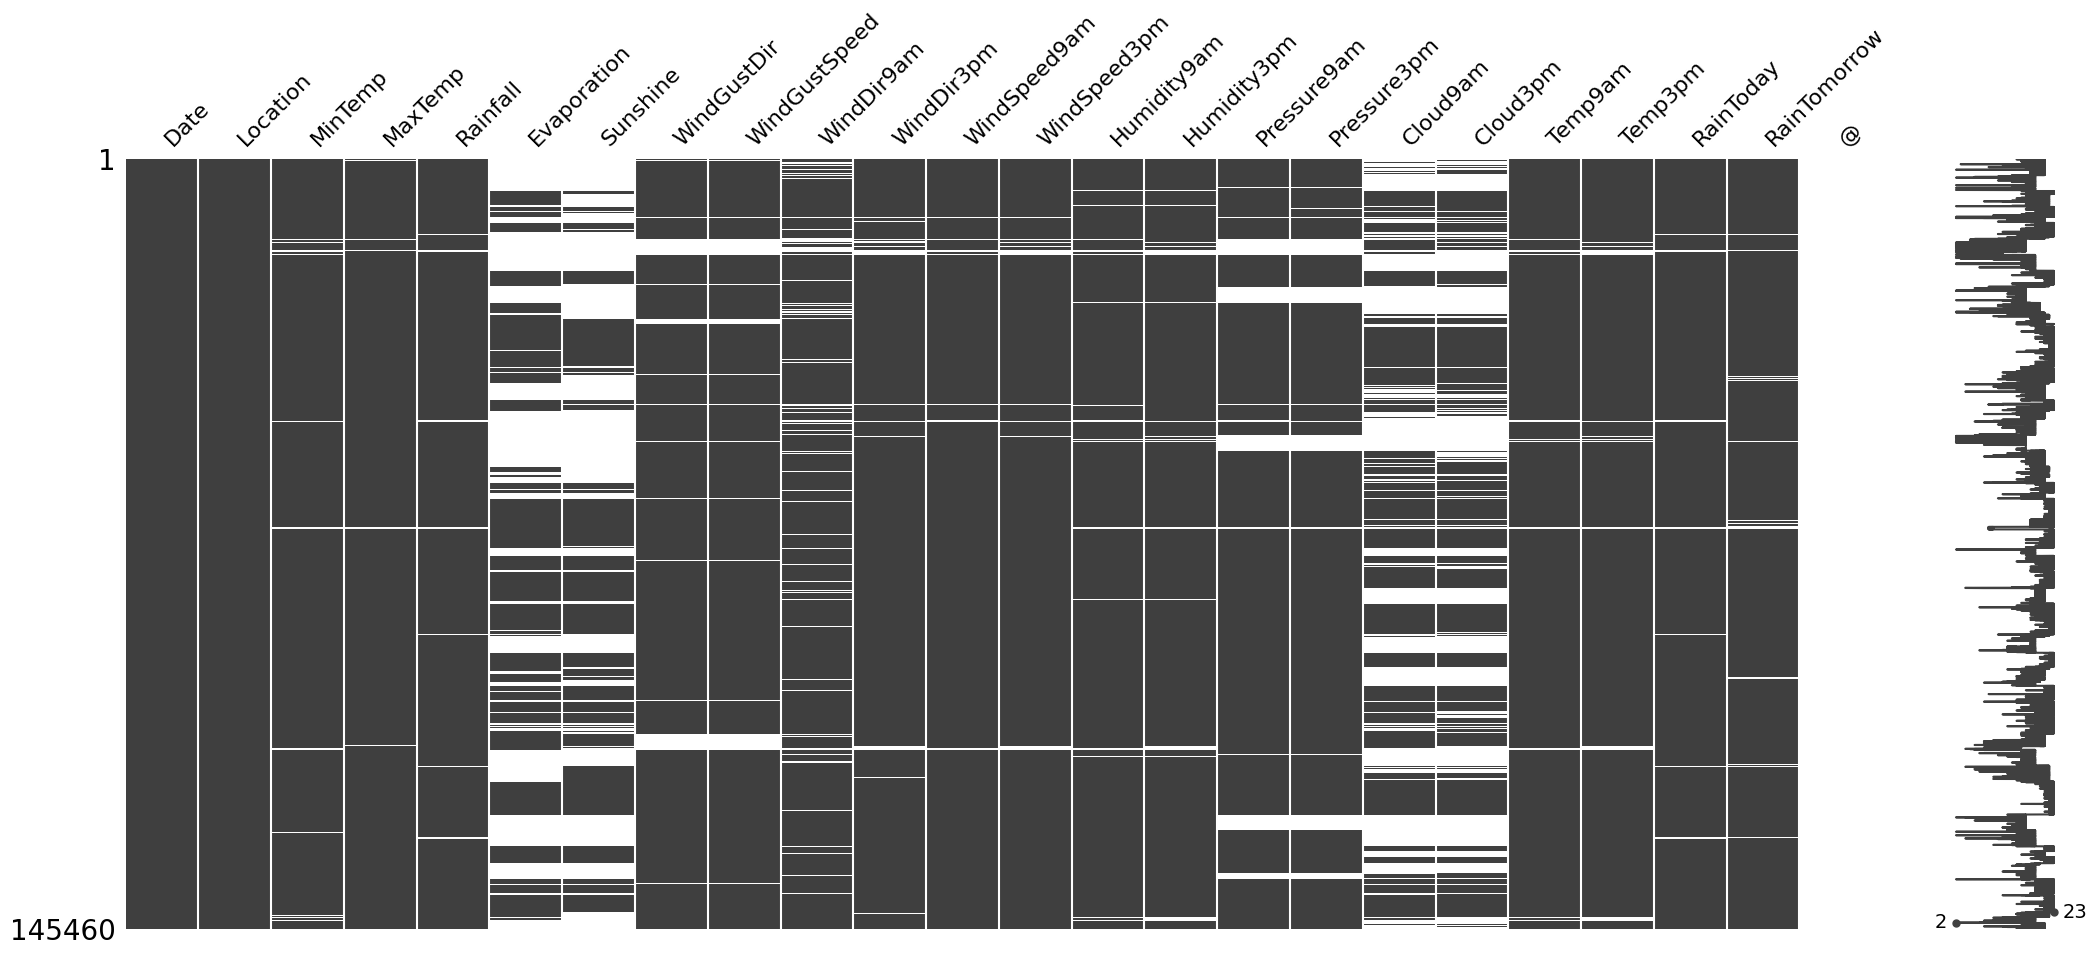

In [5]:
msno.matrix(data)
plt.show()


In [6]:
# removing columns with more than 20% missing values and segregating cat and num variables
data_cat = data[['RainToday','WindGustDir','WindDir9am','WindDir3pm']]
data.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'])
data.drop(columns=['RainToday','WindGustDir','WindDir9am','WindDir3pm'])



Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01    Delhi     13.4     22.9       0.6          NaN   
1       2008-12-02    Delhi      7.4     25.1       0.0          NaN   
2       2008-12-03    Delhi     12.9     25.7       0.0          NaN   
3       2008-12-04    Delhi      9.2     28.0       0.0          NaN   
4       2008-12-05    Delhi     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0            NaN           44.0          20.0          24.0         71.0   
1            NaN           44.0           4.0          22.0         44.0   
2            NaN           46.0          19.0          26.0         38.0   
3            NaN           24.0          11.0           9.0         45.0   
4            NaN           41.0           7.0          20.0         82.0   
...          ...            ...           ...           ...          ...   
145455       NaN           31.0          13.0          11.0         51.0   
145456       NaN           22.0          13.0           9.0         56.0   
145457       NaN           37.0           9.0           9.0         53.0   
145458       NaN           28.0          13.0           7.0         51.0   
145459       NaN            NaN          17.0          17.0         62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm RainTomorrow   @  
0          21.8           No NaN  
1          24.3           No NaN  
2          23.2           No NaN  
3          26.5           No NaN  
4          29.7           No NaN  
...         ...          ...  ..  
145455     22.4           No NaN  
145456     24.5           No NaN  
145457     26.1           No NaN  
145458     26.0           No NaN  
145459     20.9          NaN NaN  

[145460 rows x 20 columns]

In [7]:
# filling the missing data of numeric variables with mean
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)



C:\Users\rajid\AppData\Local\Temp\ipykernel_27180\577399332.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
C:\Users\rajid\AppData\Local\Temp\ipykernel_27180\577399332.py:3: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained a

0         21.8
1         24.3
2         23.2
3         26.5
4         29.7
          ... 
145455    22.4
145456    24.5
145457    26.1
145458    26.0
145459    20.9
Name: Temp3pm, Length: 145460, dtype: float64

In [8]:
# loading the names of categorical columns
cat_names = data_cat.columns


In [9]:
# initializing the simple imputer for missing categorical values
import numpy as np
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')


In [10]:
# fitting and transforming the missing data
data_cat = imp_mode.fit_transform(data_cat)


In [11]:
# converting array to dataframe
data_cat = pd.DataFrame(data_cat,columns=cat_names)


In [12]:
# concatenating the categorical and numeric data
data = pd.concat([data,data_cat],axis=1)


In [13]:
cor=data.select_dtypes(include=['number']).corr()

In [14]:
data.select_dtypes(include=['number']).corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    -0.183793 -0.675323   
Cloud3pm       0.021605 -0.277921  0.172403    -0.182618 -0.703930   
Temp9am        0.901821  0.887210  0.011192     0.545115  0.291188   
Temp3pm        0.708906  0.984503 -0.079657     0.572893  0.490501   
@                   NaN       NaN       NaN          NaN       NaN   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.177415      0.175064      0.175173    -0.232899   
MaxTemp             0.067615      0.014450      0.050300    -0.504110   
Rainfall            0.133659      0.087338      0.057887     0.224405   
Evaporation         0.203021      0.193084      0.129400    -0.504092   
Sunshine           -0.034750      0.005499      0.053834    -0.490819   
WindGustSpeed       1.000000      0.605303      0.686307    -0.215070   
WindSpeed9am        0.605303      1.000000      0.519547    -0.270858   
WindSpeed3pm        0.686307      0.519547      1.000000    -0.145525   
Humidity9am        -0.215070     -0.270858     -0.145525     1.000000   
Humidity3pm        -0.026327     -0.031614      0.016432     0.666949   
Pressure9am        -0.458744     -0.228743     -0.296351     0.139442   
Pressure3pm        -0.413749     -0.175817     -0.255439     0.186858   
Cloud9am            0.071736      0.025112      0.053337     0.452297   
Cloud3pm            0.109168      0.054639      0.025396     0.357326   
Temp9am             0.150150      0.128545      0.163030    -0.471354   
Temp3pm             0.032748      0.004569      0.027778    -0.498399   
@                        NaN           NaN           NaN          NaN   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.006089    -0.450970    -0.461292  0.078754  0.021605   
MaxTemp          -0.508855    -0.332061    -0.427167 -0.289370 -0.277921   
Rainfall          0.255755    -0.168154    -0.126534  0.198528  0.172403   
Evaporation      -0.390243    -0.270362    -0.293581 -0.183793 -0.182618   
Sunshine         -0.629130     0.041970    -0.019719 -0.675323 -0.703930   
WindGustSpeed    -0.026327    -0.458744    -0.413749  0.071736  0.109168   
WindSpeed9am     -0.031614    -0.228743    -0.175817  0.025112  0.054639   
WindSpeed3pm      0.016432    -0.296351    -0.255439  0.053337  0.025396   
Humidity9am       0.666949     0.139442     0.186858  0.452297  0.357326   
Humidity3pm       1.000000    -0.027544     0.051997  0.517120  0.523120   
Pressure9am      -0.027544     1.000000     0.961326 -0.129796 -0.147861   
Pressure3pm       0.051997     0.961326     1.000000 -0.060772 -0.084778   
Cloud9am          0.517120    -0.129796    -0.060772  1.000000  0.603564   
Cloud3pm          0.523120    -0.147861    -0.084778  0.603564  1.000000   
Temp9am          -0.221019    -0.422556    -0.470187 -0.136959 -0.126659   
Temp3pm          -0.557841    -0.286770    -0.389548 -0.302060 -0.317420   
@                      NaN          NaN          NaN       NaN       NaN   

                Temp9am   Temp3pm   @  
MinTemp        0.901821  0.7089

In [15]:
data.drop(columns=['Date'])

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0         Delhi     13.4     22.9       0.6          NaN       NaN   
1         Delhi      7.4     25.1       0.0          NaN       NaN   
2         Delhi     12.9     25.7       0.0          NaN       NaN   
3         Delhi      9.2     28.0       0.0          NaN       NaN   
4         Delhi     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
145455    Uluru      2.8     23.4       0.0          NaN       NaN   
145456    Uluru      3.6     25.3       0.0          NaN       NaN   
145457    Uluru      5.4     26.9       0.0          NaN       NaN   
145458    Uluru      7.8     27.0       0.0          NaN       NaN   
145459    Uluru     14.9      NaN       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Cloud3pm  \
0                W           44.0          W        WNW  ...       NaN   
1              WNW           44.0        NNW        WSW  ...       NaN   
2              WSW           46.0          W        WSW  ...       2.0   
3               NE           24.0         SE          E  ...       NaN   
4                W           41.0        ENE         NW  ...       8.0   
...            ...            ...        ...        ...  ...       ...   
145455           E           31.0         SE        ENE  ...       NaN   
145456         NNW           22.0         SE          N  ...       NaN   
145457           N           37.0         SE        WNW  ...       NaN   
145458          SE           28.0        SSE          N  ...       2.0   
145459         NaN            NaN        ESE        ESE  ...       8.0   

        Temp9am  Temp3pm  RainToday  RainTomorrow   @  RainToday  WindGustDir  \
0          16.9     21.8         No            No NaN         No            W   
1          17.2     24.3         No            No NaN         No          WNW   
2          21.0     23.2         No            No NaN         No          WSW   
3          18.1     26.5         No            No NaN         No           NE   
4          17.8     29.7         No            No NaN         No            W   
...         ...      ...        ...           ...  ..        ...          ...   
145455     10.1     22.4         No            No NaN         No            E   
145456     10.9     24.5         No            No NaN         No          NNW   
145457     12.5     26.1         No            No NaN         No            N   
145458     15.1     26.0         No            No NaN         No           SE   
145459     15.0     20.9         No           NaN NaN         No            W   

        WindDir9am  WindDir3pm  
0                W         WNW  
1              NNW         WSW  
2                W         WSW  
3               SE           E  
4              ENE          NW  
...            ...         ...  
145455          SE         ENE  
145456          SE           N  
145457          SE         WNW  
145458         SSE           N  
145459         ESE         ESE  

[145460 rows x 27 columns]

<Axes: >

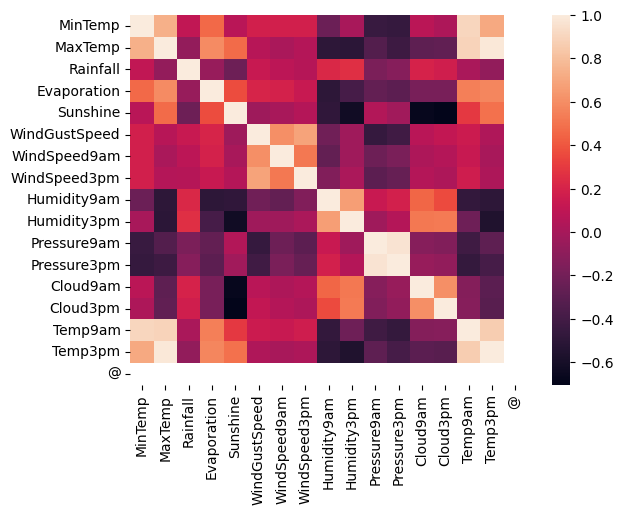

In [16]:
sns.heatmap(data=cor ,xticklabels=cor.columns.values,yticklabels=cor.columns.values)

In [17]:
data_num = data.select_dtypes(include=['number'])


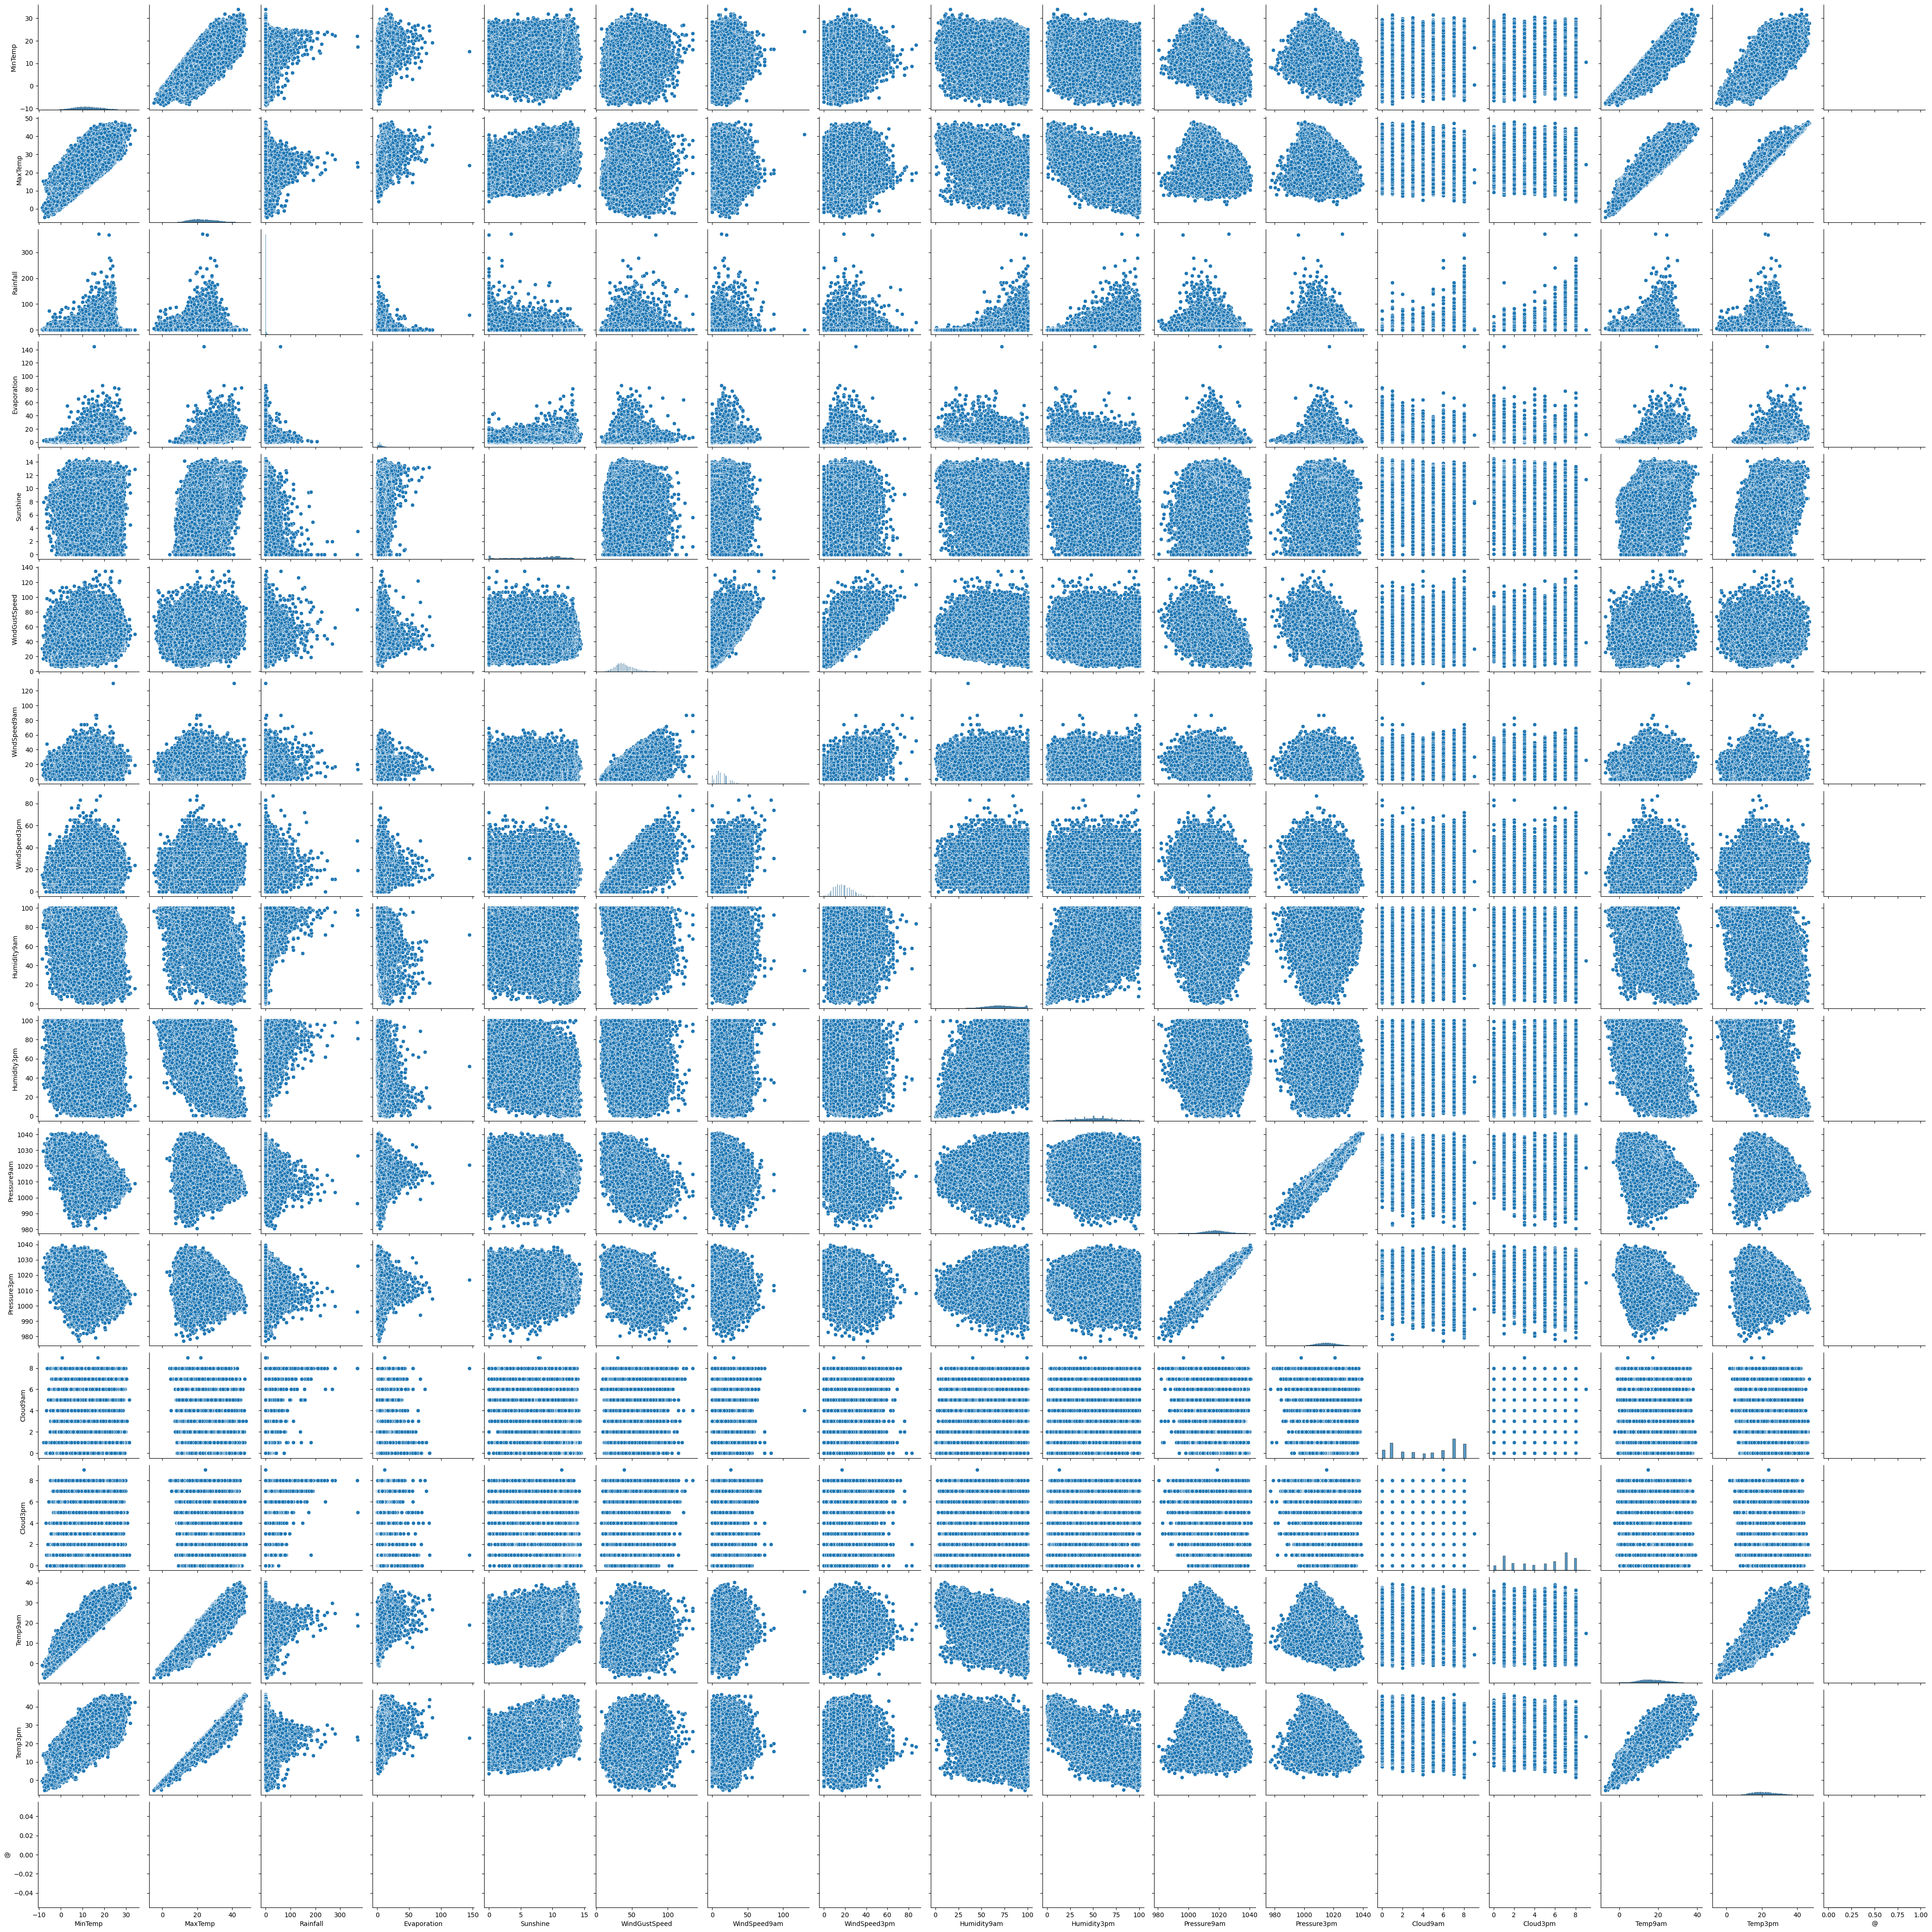

In [18]:
sns.pairplot(data_num)


<Axes: >

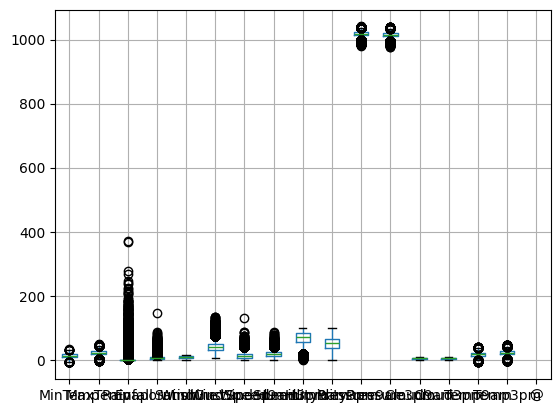

In [19]:
data.boxplot()

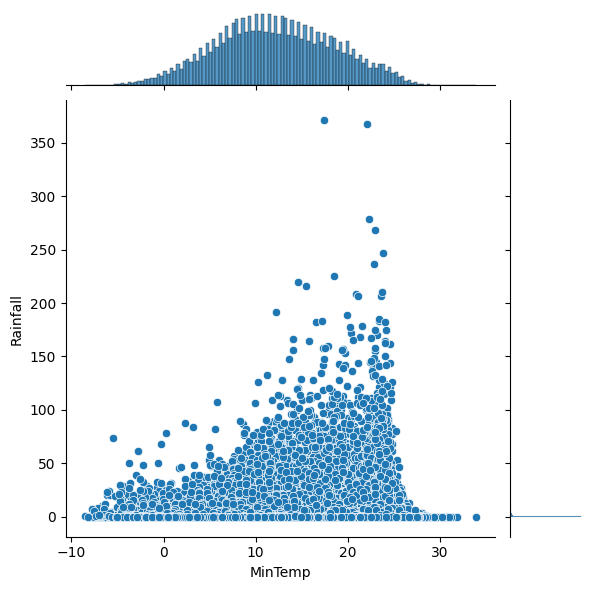

In [20]:
sns.jointplot(x='MinTemp',y='Rainfall',data=data)

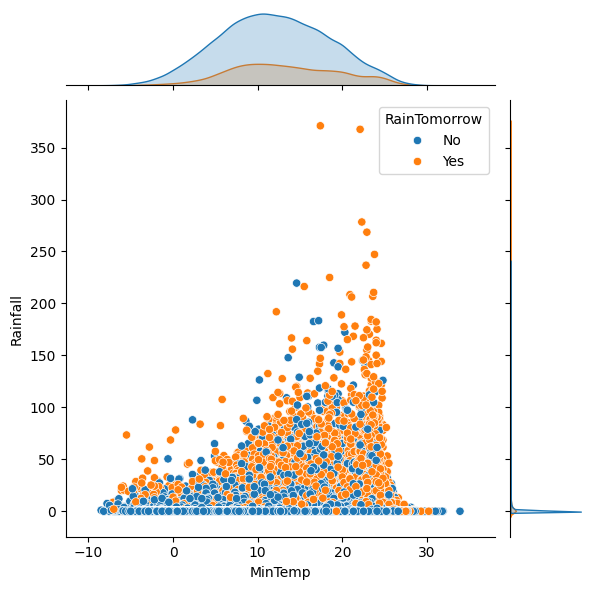

In [21]:
sns.jointplot(x='MinTemp', y='Rainfall', data=data, hue='RainTomorrow')


<Axes: xlabel='RainTomorrow', ylabel='Count'>

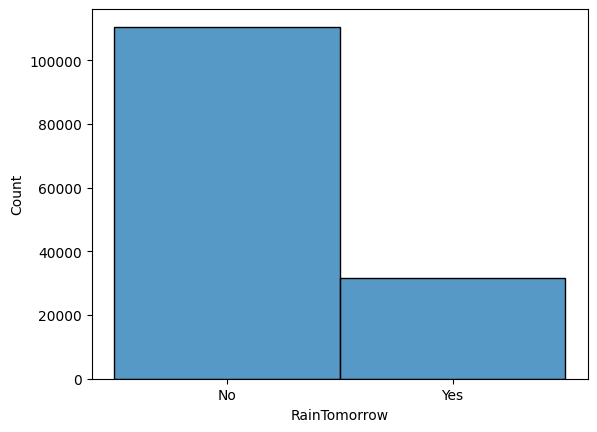

In [22]:
sns.histplot(x='RainTomorrow',data=data)

<Axes: xlabel='MaxTemp', ylabel='Rainfall'>

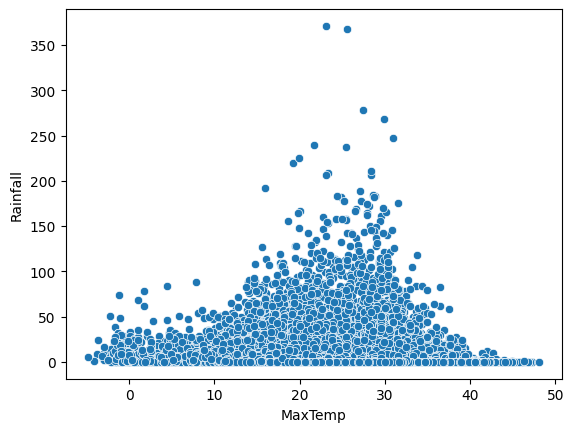

In [23]:
sns.scatterplot(x='MaxTemp',y='Rainfall',data=data)

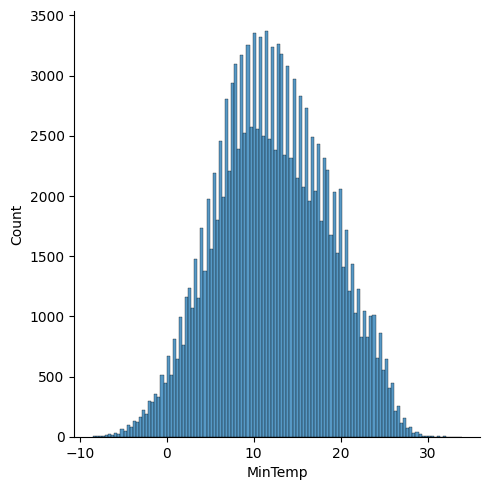

In [24]:
sns.displot(x='MinTemp',data=data)

In [25]:
y=data['RainTomorrow']
x=data.drop('RainTomorrow',axis=1)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
data = data.astype({col: 'object' for col in data.select_dtypes(include='string').columns})


In [28]:
names=x.columns

In [29]:
names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', '@', 'RainToday', 'WindGustDir', 'WindDir9am',
       'WindDir3pm'],
      dtype='str')

In [30]:
sc=StandardScaler()

In [31]:
x = sc.fit_transform(x.select_dtypes(include=['number']))


C:\Users\rajid\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\rajid\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\rajid\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [32]:
names = list(range(x.shape[1]))


In [33]:
x = pd.DataFrame(x, columns=names)


In [34]:
from sklearn import model_selection

In [35]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,train_size=0.2,random_state=0)

In [36]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import xgboost


In [38]:
from xgboost import XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

XGBoost = XGBRFClassifier()
Rand_forest = RandomForestClassifier()
svm = SVC()
Dtree = DecisionTreeClassifier()
GBM = GradientBoostingClassifier()
log = LogisticRegression()


In [39]:
y.unique()


<StringArray>
['No', 'Yes', nan]
Length: 3, dtype: str

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)


In [41]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



C:\Users\rajid\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\rajid\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\rajid\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [43]:
pd.DataFrame(x_train).isnull().sum().sum()


np.int64(365929)

In [44]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)


C:\Users\rajid\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: [16]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [45]:
x = pd.DataFrame(x)


In [46]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [48]:
XGBoost.fit(x_train, y_train)

Rand_forest.fit(x_train, y_train)

svm.fit(x_train, y_train)

Dtree.fit(x_train, y_train)

GBM.fit(x_train, y_train)

log.fit(x_train, y_train)


LogisticRegression()

In [50]:
p1=XGBoost.predict(x_train)

p2=Rand_forest.predict(x_train)

p3=svm.predict(x_train)

p4=Dtree.predict(x_train)

p5=GBM.predict(x_train)

p6=log.predict(x_train)

In [57]:
from sklearn import metrics


In [58]:
print("xgboost:", metrics.accuracy_score(y_train, p1))
print("Rand_forest:", metrics.accuracy_score(y_train, p2))
print("svm:", metrics.accuracy_score(y_train, p3))
print("Dtree:", metrics.accuracy_score(y_train, p4))
print("GBM:", metrics.accuracy_score(y_train, p5))
print("log:", metrics.accuracy_score(y_train, p6))


xgboost: 0.8353413309500893
Rand_forest: 0.9998625051560567
svm: 0.8371803244878318
Dtree: 0.9998968788670425
GBM: 0.8408239378523306
log: 0.8232675649663138


In [60]:
y_pred = Rand_forest.predict(x_test)


In [61]:
conf_matrix=metrics.confusion_matrix(y_test,y_pred)

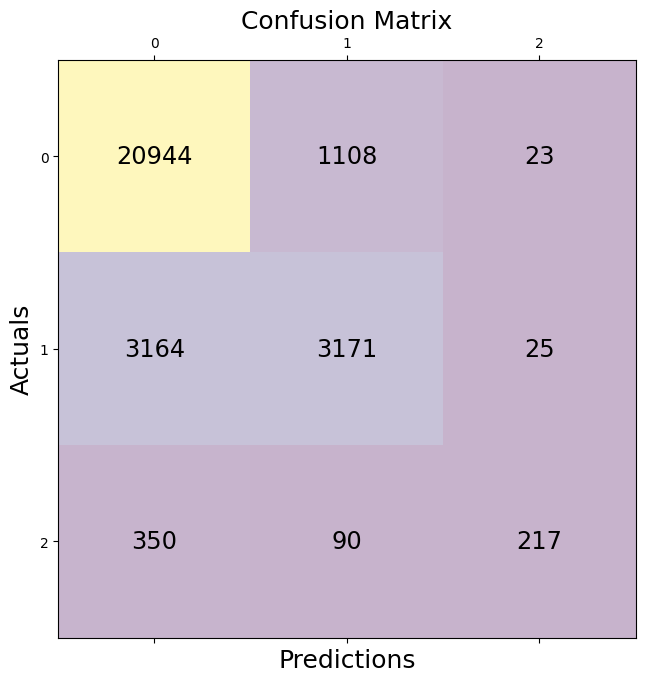

In [62]:
fig, ax= plt.subplots(figsize=(7.5, 7.5))

ax.matshow(conf_matrix, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i,j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)

plt.ylabel('Actuals', fontsize=18)

plt.title('Confusion Matrix', fontsize=18)

plt.show()

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [67]:
y_pred = Rand_forest.predict(x_test)


In [72]:
Accuracy = accuracy_score(y_test, y_pred)
Precesion = precision_score(y_test, y_pred, average='weighted')
Recall = recall_score(y_test, y_pred, average='weighted')
F1_score = f1_score(y_test, y_pred, average='weighted')



In [73]:
print(conf_matrix)
print("Accuracy:", Accuracy)
print("Precesion:", Precesion)
print("Recall:", Recall)
print("F1-score:", F1_score)


[[20944  1108    23]
 [ 3164  3171    25]
 [  350    90   217]]
Accuracy: 0.836381135707411
Precesion: 0.8269432159750902
Recall: 0.836381135707411
F1-score: 0.8229116596523632


In [84]:
y_prob = Rand_forest.predict_proba(x_test)[:, 1]

In [86]:
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

In [87]:
y_prob = Rand_forest.predict_proba(x_test)[:, 1]

In [88]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_bin[:, 1], y_prob)
roc_auc = auc(fpr, tpr)

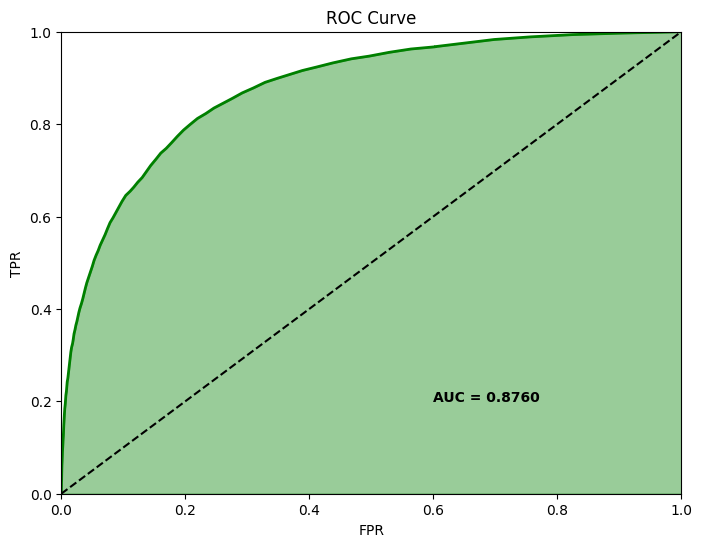

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='green', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

plt.fill_between(fpr, tpr, color='green', alpha=0.4)

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")

plt.text(0.6, 0.2, "AUC = %0.4f" % roc_auc, weight='bold')

plt.show()

In [90]:
import pickle

In [92]:
model=Rand_forest

In [93]:
import pickle

pickle.dump(model, open('rainfall.pkl','wb'))
pickle.dump(le, open('encoder.pkl','wb'))
pickle.dump(imp_mode, open('impter.pkl','wb'))
pickle.dump(sc, open('scale.pkl','wb'))